In [15]:
import cv2
import glob
import torch
import torch.cuda
import numpy as np
import os

import matplotlib.pyplot as plt

import Utils.Data.DataGen as DataGen
import Utils.PTModel.Models as Models

In [ ]:
# unified rep is not just a straight rip of the training data. 
# It is a unified representation of each level in context of itself for the lstm to learn the structure of levels from

In [16]:
bbLevelPaths = sorted(glob.glob("../data/bubble_bobble/*.png"))

In [17]:
bbLevels = [cv2.copyMakeBorder(cv2.cvtColor(cv2.imread(levelPath), cv2.COLOR_BGR2RGB), 16, 16, 16, 16, cv2.BORDER_CONSTANT) for levelPath in bbLevelPaths]
bbLevelKernals = [DataGen.ResizeLevel(level, 16, 3, columnWise=True) for level in bbLevels]

Image Height: 224 | Image Width: 240
Image Height % 16: 0 | Image Width % 16: 0
BoxHeigh: 48 | BoxWidth: 48
Start Position: 1
Kernel Size: 3
Kernel Size % 2: 1
Kernel Size % 2 * 2: 2
Height With Kernel: 12 | Width With Kernel: 13
Image Height: 224 | Image Width: 240
Image Height % 16: 0 | Image Width % 16: 0
BoxHeigh: 48 | BoxWidth: 48
Start Position: 1
Kernel Size: 3
Kernel Size % 2: 1
Kernel Size % 2 * 2: 2
Height With Kernel: 12 | Width With Kernel: 13
Image Height: 224 | Image Width: 240
Image Height % 16: 0 | Image Width % 16: 0
BoxHeigh: 48 | BoxWidth: 48
Start Position: 1
Kernel Size: 3
Kernel Size % 2: 1
Kernel Size % 2 * 2: 2
Height With Kernel: 12 | Width With Kernel: 13
Image Height: 224 | Image Width: 240
Image Height % 16: 0 | Image Width % 16: 0
BoxHeigh: 48 | BoxWidth: 48
Start Position: 1
Kernel Size: 3
Kernel Size % 2: 1
Kernel Size % 2 * 2: 2
Height With Kernel: 12 | Width With Kernel: 13
Image Height: 224 | Image Width: 240
Image Height % 16: 0 | Image Width % 16: 0


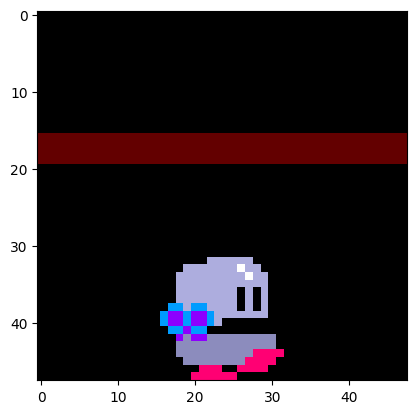

In [13]:
plt.imshow(bbLevelKernals[0][12])

In [18]:
model = torch.load("Models/TestModel.pt")

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
@torch.no_grad()
def SaveLevelUnifiedRepresentation(model, data, savePath):
    model.to(device)
    model.eval()

    if not os.path.isdir(savePath):
        os.mkdir(savePath)
    else:
        raise RuntimeError("Save Path Already Exists. Delete folder to retry...")
    
    os.mkdir(f"{savePath}/BubbleBobble")

    tiles = []
    embeddings = []

    for i, level in enumerate(data):

        imageArray = np.array(level)
        affordanceArray = np.zeros(shape=(imageArray.shape[0], 13))

        # Adjust 48 x 48 resize to be dynamic for 5 x 5 or larger kernels
        imageArrayTensor = torch.tensor(np.reshape(imageArray, (-1, 3, 48, 48)), dtype=torch.float32).to(device)
        affordanceArrayTensor = torch.tensor(affordanceArray, dtype=torch.float32).to(device)

        embeddingArray = model.encode(imageArrayTensor, affordanceArrayTensor).detach().cpu().numpy()

        centerTiles = imageArray[:, 16:32, 16:32, :]

        np.save(f"{savePath}/BubbleBobble/level{i}Embedding.npy", embeddingArray)

        tiles.extend(centerTiles)
        embeddings.extend(embeddingArray)

    np.save(f"{savePath}/BubbleBobble/centerTiles.npy", np.array(tiles))
    np.save(f"{savePath}/BubbleBobble/embeddings.npy", np.array(embeddings))

In [20]:
SaveLevelUnifiedRepresentation(model, bbLevelKernals, "testrep")